In [33]:
import numpy as np
from skimage.io import imread
from scipy.spatial.distance import cdist
from PIL import Image
import time
from matplotlib.pyplot import imshow
%matplotlib inline

In [82]:
class K_means:
    def __init__(self, k, dist='euclidean', dim=3):
        self.K = k
        self.centers = None
        self.dist = dist
        self.dim = None
        
    def train(self, data, iterations):
        self.dim = data.shape[2]
        total_points = data.shape[0] * data.shape[1]
        data = np.reshape(data, (total_points, self.dim)) # This makes the data into a 2d matrix
        self.centers = np.random.random(size=(self.K, self.dim)) * 255.0 # Randomly assign initial centers
        
        for _ in range(iterations):
            distances = cdist(data, self.centers, metric=self.dist) # Compute all of the distances from point to center
            nearest_center = np.argmin(distances, axis=1) # Get index of nearest center
            
            for i in range(self.K):
                mask = nearest_center == i # Select all of the points in the cluster
                if np.sum(mask) > 0:
                    self.centers[i] = np.mean(data[mask], axis=0) # If the cluster is nonempty set the center to the average
                else:
                    self.centers[i] = np.random.random(size=(self.dim)) * 255.0 # If the cluster is empty reassign it randomly
            #self.centers = np.clip(self.centers, 0, 255)
                
    def transform(self, data):
        shape = data.shape
        total_points = shape[0] * shape[1]
        data = np.reshape(data, (total_points, self.dim))
        transform = {i: self.centers[i] for i in range(self.centers.shape[0])}
        
        distances = cdist(data, self.centers, metric=self.dist)
        nearest_center = list(np.argmin(distances, axis=1))
        
        new_data = [transform[center] for center in nearest_center]
        return np.reshape(np.vstack(new_data), shape)

In [83]:
def train_convert(path, k, iters):
    im = imread(path)
    im = im.astype('float')
    
    model = K_means(K)
    model.train(im, iters)

    transform = model.transform(im)
    return model, Image.fromarray(transform.astype('uint8'))

In [90]:
IM_PATH = 'Photos//Small//Green.png'
K = 2
ITERS = 500

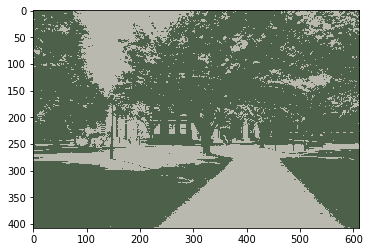

In [91]:
model, img = train_convert(IM_PATH, K, ITERS)
imshow(img)